# Introduction to Time Series Forecasting for Stock Prediction

Time series forecasting is a powerful analytical technique used to predict future values based on previously observed values. In the context of stock prediction, time series forecasting involves analyzing historical stock prices and other related financial indicators to predict future stock prices. This approach is particularly well-suited to the stock market because stock prices are sequentially ordered over time and exhibit patterns such as trends, seasonal effects, and cyclical movements.

## Key Concepts in Time Series Forecasting

Trend: A long-term increase or decrease in the data. For stock prices, this could be an upward trend over several years due to consistent company growth.
Seasonality: Regular patterns that repeat over a fixed period, such as monthly or quarterly fluctuations in stock prices.
Cyclic Patterns: Fluctuations that occur at irregular intervals, often influenced by economic cycles.
Autocorrelation: The correlation of a time series with a lagged version of itself, indicating how past values influence future values.
Common Techniques in Time Series Forecasting

- *Moving Averages:* Simplifies data by creating an average of different subsets of the full data set. Useful for identifying trends.
- *Exponential Smoothing:* Weights past observations with exponentially decreasing importance, capturing trends and seasonal patterns.
- *ARIMA (AutoRegressive Integrated Moving Average):* A sophisticated method combining autoregression (AR), differencing (I), and moving average (MA) to model time series data.
- *LSTM (Long Short-Term Memory) Networks:* A type of recurrent neural network (RNN) that is effective for modeling long-term dependencies in time series data, often used in deep learning applications for stock prediction.

## Stock Prediction in the Context of Robo-Advisors

Robo-advisors are digital platforms that provide automated, algorithm-driven financial planning services with minimal human supervision. These platforms collect information from clients about their financial situation and future goals through an online survey and then use that data to offer advice and/or automatically invest client assets.

Have a look at the video to understand Stock Market Prediction and Robo Advisory.

https://www.youtube.com/watch?v=GNcRd2M61SU

## How Stock Prediction Enhances Robo-Advisors

- Personalized Investment Strategies: By predicting future stock prices, robo-advisors can tailor investment strategies to individual client profiles, balancing risk and return according to the client's preferences and goals.
- Risk Management: Accurate stock predictions enable robo-advisors to assess and manage risks more effectively, adjusting portfolios proactively to mitigate potential losses.
- Market Timing: While timing the market perfectly is nearly impossible, predicting stock trends helps robo-advisors make informed decisions about the best times to buy or sell assets.
- Portfolio Optimization: Using stock predictions, robo-advisors can optimize portfolios by selecting a mix of assets that are expected to perform well, enhancing overall returns.
- Cost Efficiency: Automated systems that incorporate stock predictions reduce the need for manual intervention, lowering operational costs and making financial advice more accessible and affordable.

## Conclusion

Time series forecasting for stock prediction plays a crucial role in enhancing the functionality and effectiveness of robo-advisors. By leveraging advanced predictive analytics, these automated platforms can offer personalized, efficient, and adaptive investment strategies that cater to the diverse needs of their clients. As the field of financial technology continues to evolve, the integration of sophisticated time series forecasting methods into robo-advisory services is set to revolutionize the landscape of investment management.

In [1]:
# install in terminal before your jupyter notebook coding
# xcode-select --install

# in jupyter notebook
# pip install lxml
# pip install yfinanc`e

# restart kernel

# We first import the necessary libraries.
- yfinance is used to download the historical market data from Yahoo finance.
- matplotlib.pyplot is used for creating static, animated, and interactive visualizations in Python.
- ARIMA is a common model used for predicting future points in a series.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

/Users/gurkirankaur/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# We use yfinance's download function to fetch the historical market data. 
- For this example, we are considering stock data for Apple ('AAPL') and Tesla ('TSLA') from the start of 2019 to the start of 2023.
- Each of the dataframes 'data_apple' and 'data_tesla' has several columns such as Open, High, Low, Close, Adj Close, Volume.
- Since we are interested only in the closing prices, we'll select the 'Close' column.

In [3]:
# Download historical data as dataframe
data_apple = yf.download('AAPL', start='2019-01-01', end='2023-07-21')
data_tesla = yf.download('TSLA', start='2019-01-01', end='2023-07-21')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# data_apple.head()

In [5]:
# data_tesla.head()

In [6]:
# data_apple.info()

In [7]:
# data_apple.describe()

In [8]:
# data_tesla.info()

In [9]:
# data_tesla.describe()

# Let's visualize the closing prices of both stocks with time to see how they've changed. 
 - We're using matplotlib's pyplot for this.

In [10]:
# We'll use only the closing prices
closing_prices_apple = data_apple['Close']
closing_prices_tesla = data_tesla['Close']

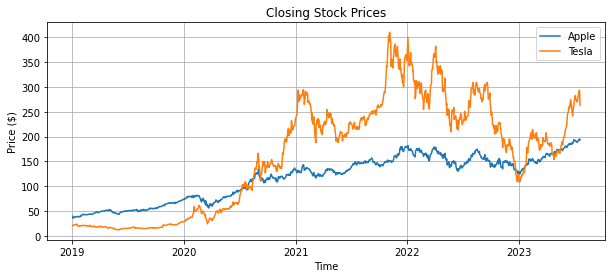

In [11]:
# Visualize the closing prices
plt.figure(figsize=(10,4))
plt.plot(closing_prices_apple, label='Apple')
plt.plot(closing_prices_tesla, label='Tesla')
plt.title('Closing Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Now, let's use the ARIMA model to forecast the stock prices.
 - We create an instance of the ARIMA model for both Apple's and Tesla's stock prices.
 - It's important to note that the choice of parameters (5,1,0) for the ARIMA model is a simplification. In reality, one should use statistical tests and plots (like the Autocorrelation function) to guide the choice of these parameters.


ARIMA Model
ARIMA (AutoRegressive Integrated Moving Average) is a popular model used in time series analysis to understand the data and predict the future points in the series.

In the ARIMA model:
- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- I: Integrated. The use of differencing of raw observations in order to make the time series stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Let's use ARIMA model to forecast Apple's stock prices. For simplicity, we are using the parameters (5,1,0) for the ARIMA model.

In [12]:
# Fit the ARIMA model for Apple's stock
model_apple = ARIMA(closing_prices_apple, order=(5,1,0))
model_fit_apple = model_apple.fit()

# Fit the ARIMA model for Tesla's stock
model_tesla = ARIMA(closing_prices_tesla, order=(5,1,0))
model_fit_tesla = model_tesla.fit()

/Users/gurkirankaur/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gurkirankaur/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gurkirankaur/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gurkirankaur/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency in

# Once the model has been fit, we can use it to make predictions.


In [13]:
# Make predictions for Apple's stock
predictions_apple = model_fit_apple.predict(typ='levels')

# Make predictions for Tesla's stock
predictions_tesla = model_fit_tesla.predict(typ='levels')

# We now compare the original closing prices with the predicted ones for both stocks.

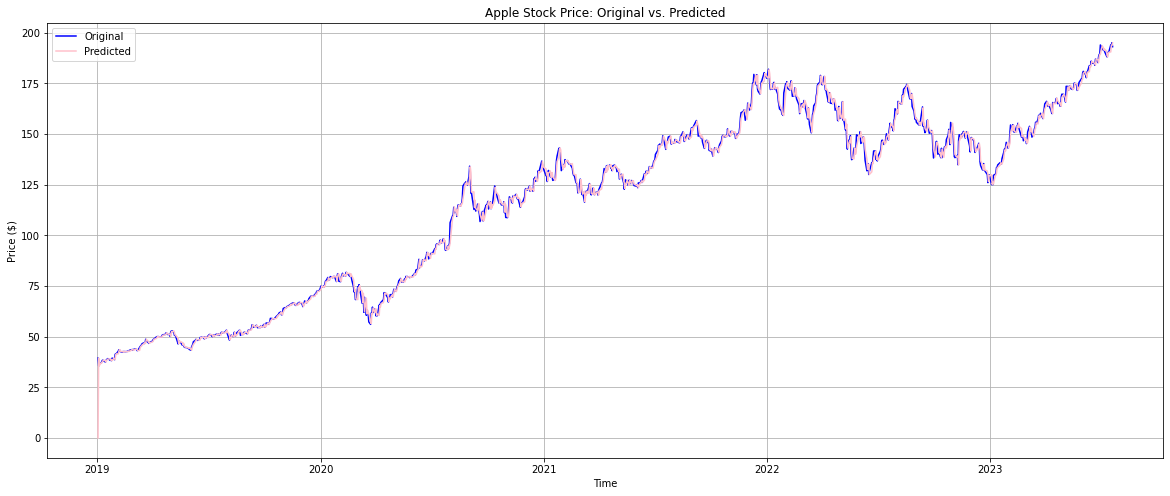

In [14]:
# Plot the original and predicted closing prices for Apple
plt.figure(figsize=(20,8))
plt.plot(closing_prices_apple, color='blue', label='Original')
plt.plot(predictions_apple, color='pink', label='Predicted')
plt.title('Apple Stock Price: Original vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

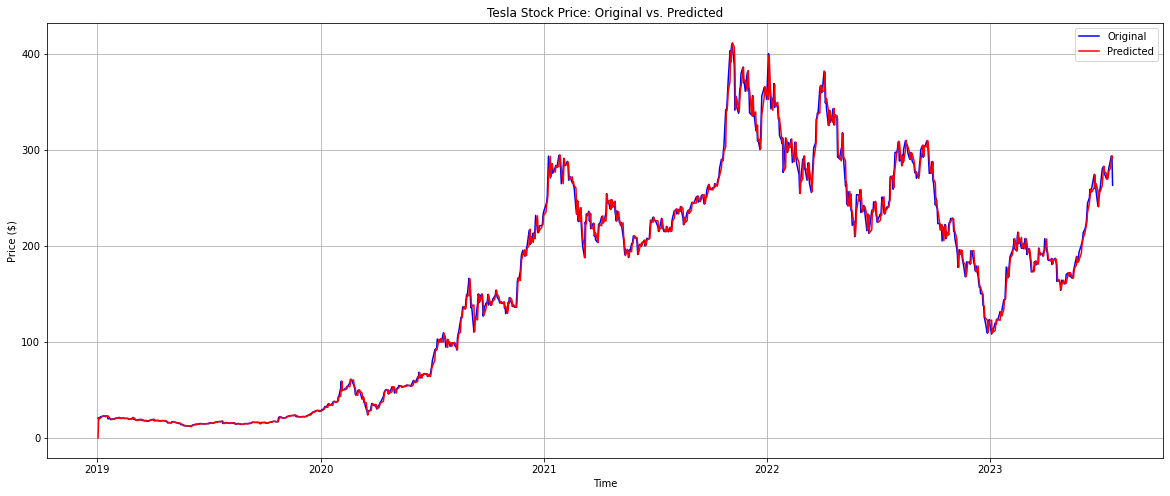

In [15]:
# Plot the original and predicted closing prices for Tesla
plt.figure(figsize=(20,8))
plt.plot(closing_prices_tesla, color='blue', label='Original')
plt.plot(predictions_tesla, color='red', label='Predicted')
plt.title('Tesla Stock Price: Original vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Error Percentage
- We can calculate the mean absolute percentage error (MAPE) which gives the mean of absolute percent errors for each prediction.
- This can be used to understand the level of error in the model.

MAPE = (1/n) * Σ(|actual - prediction| / |actual|) * 100%

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
mape_apple = mean_absolute_percentage_error(closing_prices_apple, predictions_apple)
mape_tesla = mean_absolute_percentage_error(closing_prices_tesla, predictions_tesla)

print(f"MAPE for Apple: {mape_apple:.2f}%")
print(f"MAPE for Tesla: {mape_tesla:.2f}%")

MAPE for Apple: 1.56%
MAPE for Tesla: 3.03%


The MAPE or Mean Absolute Percentage Error is a measure used to determine the accuracy of a predictive model. It is the average of the absolute difference between the actual and predicted values, expressed as a percentage of the actual values. The MAPE value indicates the average error percentage of the predictions. A lower MAPE is typically desirable as it represents a smaller average percentage error.

In your case, a mape_apple of 1.56% means that the average prediction error of the ARIMA model for Apple's stock price is around 1.56%. This means that, on average, the model's forecasts deviate by about 1.56% from the actual closing prices.

# Future Values
- We can use the `get_forecast()` method to predict future values. Here, we'll predict the next 10 days.
- `get_forecast()` returns an object that contains prediction and info about the confidence intervals. We can use `.predicted_mean` to get just the predictions.


In [18]:
forecast_apple = model_fit_apple.get_forecast(steps=10).predicted_mean
forecast_tesla = model_fit_tesla.get_forecast(steps=10).predicted_mean

print("Apple forecast:\n", forecast_apple)
print("\nTesla forecast:\n", forecast_tesla)

Apple forecast:
 1145    193.179350
1146    193.352424
1147    193.362239
1148    193.434835
1149    193.339618
1150    193.342986
1151    193.351515
1152    193.352866
1153    193.356576
1154    193.351921
Name: predicted_mean, dtype: float64

Tesla forecast:
 1145    264.178535
1146    263.695283
1147    263.406367
1148    262.073335
1149    262.607445
1150    262.524987
1151    262.520897
1152    262.462933
1153    262.510640
1154    262.495973
Name: predicted_mean, dtype: float64


/Users/gurkirankaur/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/gurkirankaur/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Improving the Model
- Model's performance can often be improved by tuning its parameters. In this case, the order of the ARIMA model (p, d, q) could be tuned.
- More sophisticated models could also be used. For example, the SARIMA model also takes seasonality into account.
- Additional features could be added to the model. For example, if we were predicting the stock price of a single company, we could use the company's earnings reports as an additional feature.

### In conclusion, while this notebook provides a simple introduction to time series forecasting with ARIMA, much more could be done to improve the model's performance.